In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk
import string
import unicodedata
import seaborn as sns

# from unidecode import unidecode


# Original Raw Data

In [41]:
data = pd.read_csv('dataset/train.csv')
data

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159571 rows x 8 columns]

### Drop Columns

In [42]:
data = data.drop(['obscene',"threat","insult",'identity_hate'], axis=1) 
data

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  
0           0             0  
1           0             0  
2           0             0  
3           0             0  
4           0             0  
...       ...           ...  
159566      0             0  
159567      0             0  
159568      0             0  
159569      0             0  
159570      0             0  

[159571 rows x 4 columns]

144277
15294


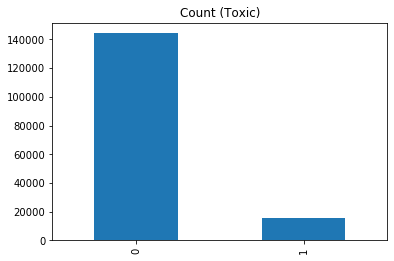

In [43]:
toxic_count = data.toxic.value_counts()
print((data['toxic'] == 0).sum())
print((data['toxic'] == 1).sum())
toxic_count.plot(kind='bar', title='Count (Toxic)')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            159571 non-null  object
 1   comment_text  159571 non-null  object
 2   toxic         159571 non-null  int64 
 3   severe_toxic  159571 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.9+ MB


### Get only 20k samples

In [45]:
# new_data = data.sample(n = 20000)
# new_data

Save to data to new csv

In [46]:
# new_data.to_csv('dataset/new_data.csv',index=False)

In [47]:
# new_data

In [48]:
# new_data.info()

### Check for any duplicates

In [49]:
# replace empty cell with NaN value
data = data.replace(r'^\s*$', np.NaN, regex=True)
data

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  
0           0             0  
1           0             0  
2           0             0  
3           0             0  
4           0             0  
...       ...           ...  
159566      0             0  
159567      0             0  
159568      0             0  
159569      0             0  
159570      0             0  

[159571 rows x 4 columns]

In [50]:
#find for duplicate rows (if any)
data[['id','comment_text']].duplicated().sum()

0

### Count number of text in each comment

In [51]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words))

data['count'] = data['comment_text'].apply(lambda x: avg_word(x))
data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  count  
0             0    222  
1             0     95  
2             0    192  
3             0    507  
4             0     55

In [52]:
data.describe()

toxic   severe_toxic          count
count  159571.000000  159571.000000  159571.000000
mean        0.095844       0.009996     324.644791
std         0.294379       0.099477     488.555100
min         0.000000       0.000000       5.000000
25%         0.000000       0.000000      79.000000
50%         0.000000       0.000000     169.000000
75%         0.000000       0.000000     358.000000
max         1.000000       1.000000    4965.000000

### Basic count of toxidity

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


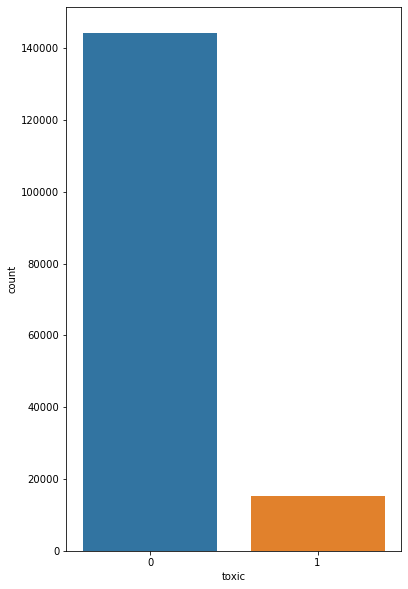

In [53]:
#toxic
plt.figure(figsize=(6, 10))
sns.countplot(data['toxic'])

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


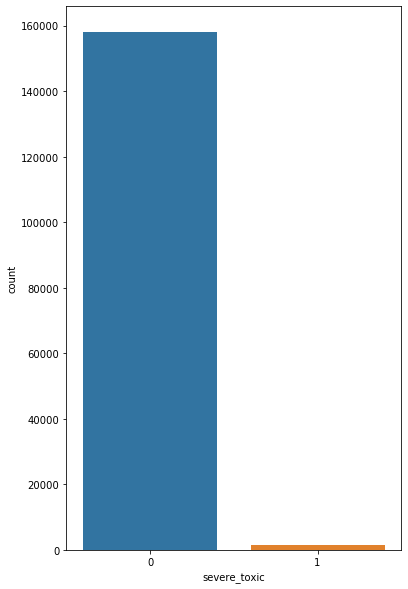

In [54]:
#severe toxic
plt.figure(figsize=(6, 10))
sns.countplot(data['severe_toxic'])

In [55]:
# #toxic
# plt.figure(figsize=(6, 10))
# sns.countplot(new_data['toxic'])

In [56]:

count = (data['toxic'] == 0).sum()
print("total toxic count: " ,count)

total toxic count:  144277


In [57]:
count = (data['toxic'] == 1).sum()
print("total toxic count: " ,count)

total toxic count:  15294


# UnderSampling Data

### Import Data

In [58]:
under_sampling = pd.read_csv('dataset/undersampling.csv')
under_sampling

Unnamed: 0                id  \
0               0  c436fcdd4acc928a   
1               1  17bb9f8b0e2ff008   
2               2  e86ae38d7ff0c1ff   
3               3  cb1fcb465bd93930   
4               4  140cb8dc1570e423   
...           ...               ...   
30583       30583  fef4cf7ba0012866   
30584       30584  ff39a2895fc3b40e   
30585       30585  ffa33d3122b599d6   
30586       30586  ffb47123b2d82762   
30587       30587  ffbdbb0483ed0841   

                                            comment_text  severe_toxic  \
0      naw i am fine see you later guys you rock ) ha...             0   
1              LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1             0   
2      You jumped the gun a bit too early - that's my...             0   
3                                No way, Mercedez PWNZ!!             0   
4      I noticed it doesn't mention if the real Presi...             0   
...                                                  ...           ...   
30583  "\n\n our previous conversation \n\nyou fuckin...             0   
30584                  YOU ARE A MISCHIEVIOUS PUBIC HAIR             0   
30585  Your absurd edits \n\nYour absurd edits on gre...             0   
30586  "\n\nHey listen don't you ever!!!! Delete my e...             0   
30587  and i'm going to keep posting the stuff u dele...             0   

       obscene  threat  insult  identity_hate  toxic  
0            0       0       0              0      0  
1            0       0       0              0      0  
2            0       0       0              0      0  
3            0       0       0              0      0  
4            0       0       0              0      0  
...        ...     ...     ...            ...    ...  
30583        1       0       1              1      1  
30584        0       0       1              0      1  
30585        1       0       1              0      1  
30586        0       0       1              0      1  
30587        1       0       1              0      1  

[30588 rows x 9 columns]

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


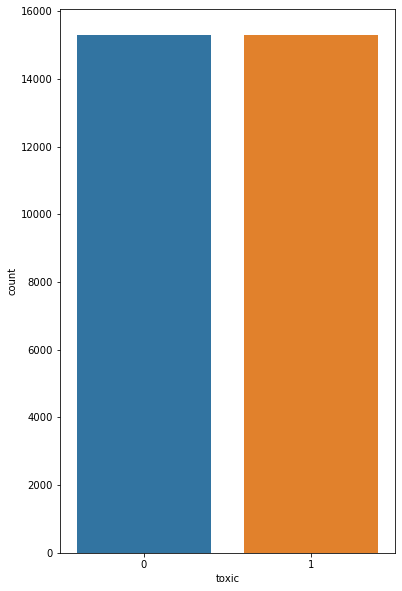

In [59]:
plt.figure(figsize=(6, 10))
sns.countplot(under_sampling['toxic'])

C:\Users\z\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


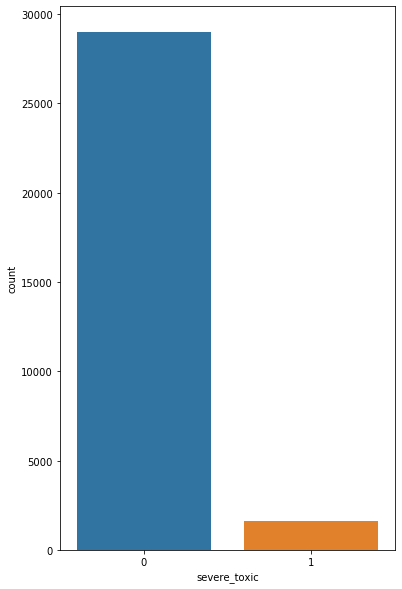

In [60]:
#severe toxic
plt.figure(figsize=(6, 10))
sns.countplot(under_sampling['severe_toxic'])

In [61]:
count = (under_sampling['toxic'] == 0).sum()
print("total non-toxic count: " ,count)

total non-toxic count:  15294


In [62]:
count = (under_sampling['toxic'] == 1).sum()
print("total toxic count: " ,count)

total toxic count:  15294


### Drop Columns

In [63]:
under_sampling = under_sampling.drop(['Unnamed: 0','obscene',"threat","insult",'identity_hate'], axis=1) 
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic  
0                 0      0  
1                 0      0  
2                 0      0  
3                 0      0  
4                 0      0  
...             ...    ...  
30583             0      1  
30584             0      1  
30585             0      1  
30586             0      1  
30587             0      1  

[30588 rows x 4 columns]

### Clean Data

In [64]:
# data7 = data.iloc[100000:120000]
# data7

#### Remove Username, Hashtags and Links 

In [65]:
cleanedText = []
linkRegex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
usernameRegex = r'@[^\s]+'
hashtagRegex = r'#[^\s]+'

for row in under_sampling['comment_text'].iteritems():

    x = row[-1]
    x = re.sub(linkRegex, '', x)
    x = re.sub(usernameRegex, '', x)
    x = re.sub(hashtagRegex, '', x)
    x = x.strip()
    cleanedText.append(x)

under_sampling['cleaned_text'] = cleanedText

In [66]:
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  naw i am fine see you later guys you rock ) ha...  
1                 0      0          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1  
2                 0      0  You jumped the gun a bit too early - that's my...  
3                 0      0                            No way, Mercedez PWNZ!!  
4                 0      0  I noticed it doesn't mention if the real Presi...  
...             ...    ...                                                ...  
30583             0      1  "\n\n our previous conversation \n\nyou fuckin...  
30584             0      1                  YOU ARE A MISCHIEVIOUS PUBIC HAIR  
30585             0      1  Your absurd edits \n\nYour absurd edits on gre...  
30586             0      1  "\n\nHey listen don't you ever!!!! Delete my e...  
30587             0      1  and i'm going to keep posting the stuff u dele...  

[30588 rows x 5 columns]

### Replace Acronym with full form words

In [67]:
replace_dict =  {
"ain't": "am not",
"ain’t": "am not",
"aren’t": "are not",
"aren't": "are not",
"bc": "because",
"can't": "cannot",
"can’t": "cannot",
"Can't":"cannot",
"can't've": "cannot have",
"cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn’t": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"didn’t": "did not",
"don’t": "do not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"how’s": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i’ll": "I will",
"i'll": "I will",
"i'll've": "I will have",
"i'll": "i will",
"i'm": "I am",
"im": "I am",
"i’m": "I am",
"i've": "I have",
"i’ve": "I have",  
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it’ll": "it will",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"it’s": "it is",
"I'm": "I am",
"i'm":"i am",
"It’s": "it is",
"It's": "it is",
"let's": "let us",
"irl":"in real life",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"d'aww"
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"That's": "that is",
"that’s": "that is",
"there'd": "there had",
"There’s": "there is",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"we’re": "we are",
"we’ve": "we have",
"weren't": "were not",
"whot":"what",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y’all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"here's": "here is",
"what’s": "what is",
"m00n":"moon",
"gt": "got",
"cuz": "because",
"coz":"because",
"bc": "because",
"rn": "right now",
"ima" : "i am a",
"pls": "please",
"alil": "a little",
"q's": "q",
"luv": "love",
"fwiw": "for what it is worth",
"francξ": "france",
"futurξ": "future",
"financξ" : "finance",
"founder's": "founder",
"secs": "seconds",
"r.i.p." : "rest in peace",
"tyvm": "thank you very much",
"u": 'you',
"kindof" : "kind of",
"wiki": "wikipedia",
"naw":'nope'
}

In [68]:
cleanedText = []
for row in under_sampling['cleaned_text'].iteritems():
    text = row[-1]
    text = text.lower() #change to lower case
    text = " ".join(text.split()) #remove extra spaces in string
    test = text.split() #get indiv words to replace
    text = [replace_dict.get(w, w) for w in test] #replace common short forms
    text = " ".join(text)

    cleanedText.append(text)

under_sampling['cleaned_text'] = cleanedText
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  nope i am fine see you later guys you rock ) h...  
1                 0      0             lol reddit pwn you lmao. unknowntales1  
2                 0      0  you jumped the gun a bit too early - that is m...  
3                 0      0                            no way, mercedez pwnz!!  
4                 0      0  i noticed it does not mention if the real pres...  
...             ...    ...                                                ...  
30583             0      1  " our previous conversation you fucking shit e...  
30584             0      1                  you are a mischievious pubic hair  
30585             0      1  your absurd edits your absurd edits on great w...  
30586             0      1  " hey listen do not you ever!!!! delete my edi...  
30587             0      1  and i am going to keep posting the stuff you d...  

[30588 rows x 5 columns]

In [69]:
cleanedText = []
for row in under_sampling['cleaned_text'].iteritems():
    text = row[-1]
    text = text.lower() #change to lower case
    text = " ".join(text.split()) #remove extra spaces in string
    test = text.split() #get indiv words to replace
    text = [replace_dict.get(w, w) for w in test] #replace common short forms
    text = " ".join(text)

    cleanedText.append(text)

under_sampling['cleaned_text'] = cleanedText
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  nope i am fine see you later guys you rock ) h...  
1                 0      0             lol reddit pwn you lmao. unknowntales1  
2                 0      0  you jumped the gun a bit too early - that is m...  
3                 0      0                            no way, mercedez pwnz!!  
4                 0      0  i noticed it does not mention if the real pres...  
...             ...    ...                                                ...  
30583             0      1  " our previous conversation you fucking shit e...  
30584             0      1                  you are a mischievious pubic hair  
30585             0      1  your absurd edits your absurd edits on great w...  
30586             0      1  " hey listen do not you ever!!!! delete my edi...  
30587             0      1  and i am going to keep posting the stuff you d...  

[30588 rows x 5 columns]

### Remove Stopwords, Abbv, Punctuations and Lemmatization and Tag POS

In [70]:
import re
import nltk
from nltk.corpus import wordnet
from wordcloud import WordCloud
nltk.download('stopwords')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
# remove stopwords
def remove_stop_words(text):
    clean_text = []
    for word in text.split():
        if word.strip().lower() not in stop_words:
            clean_text.append(word)
            
    return " ".join(clean_text)

In [72]:
lemmatizer = nltk.WordNetLemmatizer()

In [73]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

Cleaning executed here

In [74]:
cleanedText = []
for row in under_sampling['cleaned_text'].iteritems():
    text = row[-1]    
    text = re.sub("’s|'s", '', text) #remove pronoun
    text = re.sub('[^\w\s]','', text) #remove apostrophe
    text = re.sub('[^a-zA-Z]', ' ', text) #remove punctuation
    text = text.lower() #change to lower case
    text = remove_stop_words(text)
    text = " ".join(text.split()) #remove extra spaces in string


    
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text)) 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    text = " ".join(lemmatized_sentence)

    cleanedText.append(text)
    
under_sampling['cleaned_text'] = cleanedText
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  
0                 0      0  nope fine see later guy rock hahahahaha userbi...  
1                 0      0                   lol reddit pwn lmao unknowntales  
2                 0      0               jump gun bit early first revert hour  
3                 0      0                                  way mercedez pwnz  
4                 0      0                 notice mention real president shot  
...             ...    ...                                                ...  
30583             0      1  previous conversation fuck shit eating liberal...  
30584             0      1                            mischievious pubic hair  
30585             0      1  absurd edits absurd edit great white shark tot...  
30586             0      1  hey listen ever delete edits ever annoy wwe k ...  
30587             0      1  go keep post stuff delete fuck site close fun ...  

[30588 rows x 5 columns]

In [75]:
for comments in under_sampling['cleaned_text']:
    print(comments)

nope fine see later guy rock hahahahaha userbig foot
lol reddit pwn lmao unknowntales
jump gun bit early first revert hour
way mercedez pwnz
notice mention real president shot
kyle dane john fredirick brennan bear december ohio america bear parent jennifer country music singer grant brennan two old sibling family move los angeles live late kyle parent decide change move sydney australia dane start school attend local public school family seem settle australia kyle father quit business kyle parent divorce mother live small suburb south sydney family home jennifer leave brother currantly reside late kyle prefers call dane interview nashville nancy regan small town reporter tennesse dane currently father comeback country music award interview dane confess got tease lot school kid make tough gay near nkow fact wrds dane use interview dane also state want go business like much good australia father family leave alone medium late dane relationship father sour father married alison brennan ha

online want discus anything whatever online little bit talk
result consensus want result blank discus later
please leave inappropriate templateswarnings talk page unless back engage edit war revert page today rest edits addition reversion warning inappropriate opinion see comment engage edit war along two party dispute talk talk page go request comment also respond userpage per rule userpage
thank experiment wikipedia test work revert removed please use sandbox test may want take look welcome page learn contribute encyclopedia
thanks agree change wrt income decline example maybe previous sentence would comprehensible chinese reader
yes consensus work encyclopedia matter individual editor understand want put center discussion care edit care make encyclopedia well wish stop edit football related article stop
problem best wish
mainstream christian mainstream wikipedian say might true thus text article always stress accord myth christianity among thing symbolology aforementioned general cr

clumsy staff store management feb walmart department manager write long letter publish gawker state home office give store manager set amount hour payroll dollar schedule peoplepay people area store base sale department day previous fiscal year even though last year friday snow one shopping year saturday sunny everyone shop anyone around help last year make enough money walmart worker explain walmart customer service horrible gawker hamilton nolan feb reflection hard time believe sorry mean walmart really take account whether friday medium customer vs saturday lot customer guy department manager job lead team keep assigned area stock put back together customer tear frank guess think walmart probably cashier saturday okay customer shopping want know something employee thrill help customer employee include department manager go later get criticize get work do point well take
bold textitalic textokay school thing
pl jim two tend forget others watch monitor edits comment well little positi

note essential feature debtor force acceptance legal tender discharge debt debt denominate currency legal tender money repeat owe onion could owe onion insist repayment onion legal tender ascribe certain example coin note particular money special status nothing prevent two different monies circulation coin note legal tender common mean contrary
crossserver link find crossserver link improperly mark many article like miss open colon typoepidemic meddle kinda protocol bother change dozen link tamil nadu united arab emirate
accepted linux codingstyle file mandate minor variation specialcasing function decently common though space within line indent seldom strictly enforce
hm amaze even notice wrong acronym tizzle
please stop continue vandalize wikipedia block edit talk
story think need story headline come gameplay headline
read rex alexander comment
add info could do ten minute research also remove claim michael live romania doesnt live geneva although make regular appearance romania see 

oops interest ip anyway wish merry christmas happy new year
scoobydude green goo
congressman dan burton need help dan burton page accord congressional biography indiana ballot proper name danny burton find evidence name daniel actually bear danny lee burton source pretty new wikipedia edit page wrong follow proper channel thanks help
file jpg list deletion file upload alter file jpg list wikipediafiles deletion please see discussion see may search title image find entry interested delete andemu
think outline current article fine think math section mostly relocate make less readable section probably could use reword still trail section could well integrate think core article fine part trouble reading
sometimes one must begin little bit method make know grip use source critical way honestly deserve people speak head else get clarity
check demarce source see say personal essay see anything show publish peer review anything nature exactly sure website host say comprehensive collection onli

thanks quick reply saw voting go suppose thought lot hysteria base think touchy wonderful category go round maybe see appeal thanks
criticism doesnt seem unbiased criticism aspect seem unbiased intially begin present point view go present clint eastwood side view exclusively basically present spike viewpoint doesnt go explain say say know black soldier indeed depict movie basically doesnt present third party viewpoint go refute spike comment show wrong actionsin bold do author wikipedia page instead show commentary action spike lee issue involve may true fair present information way comment present reflect spike view point since lot text use tacitly support clint eastwood viewpoint refute spike issue movie think violate term unbiased presentation wikipedia
wikipediaarticles deletionbavarian pigeon corp hey lara let know article nommed deletion one else vecia
name different subjectarticle previously delete deleted article appear relate business promotion current someone decease crucial 

give able hold fort plus others soon arrive
disagree place outside speculative mention within article mostly science surround powered descent without heatshields due involve concept tethered descent science regard topic contain within topic space elevator include material concern robotics energy transfer power climber etc even notable talk topic mostly concern ascension ie place satellite orbit little concerned research topic descension space elevator mind call space elevator recognize term use describe within technical circuit include nasa research institution agree idea possibility within year powered descent without heat shield simply research talk even speculation project even look thus mention best within article
illustrate importance poet traditional arab society entire tribe become muslim directly death specifically attribute poetry longer affect tribe alfred guillaume life muhammad translation ibn ishaq sirat rasul allah oxford university press pg
deletion hi think got confuse 

protection canada page unneccessary edit war refer long cease occur october mutual agreement debate take dominion page continue sorry make clear aim bring attention show pattern edit war repeat want nip bud start thanks
left right wing politcal economic structure wing therefore bias opinion gammar defintion use real definitons system structure
harm continue discussion consensus think important note commonly use word dictionary agree definition think valid point need inclusion way
belief radiokirk onlyone belives
artist whose work display grove mislabeled member dozen artist appear connection grove apart art display list member include samuel brook norton bush g cadenasso paul frenzeny percy grey christian jorgenson larenzo latimer xavier martinez daniel oconnell gorttado piazzoni granville redman william ritschel julian rix smith jules tavenier frank van sloun virgil williams theodore wores source member break link fine art website saint mary university search around website find link 

post edit war ani please stop edit war stop forget wp rr talk
article startclass rating accord wikipedia needs information less included idea statistic
well one item wait talk end impressed little physical trait thawmorse shaun evans give us tug collar etc also like fleshing thing morse past original series refer year also like saw young version max pathologist peter woodthorpe john thaw interplay delight first three season morse one question go endeavor episode page move take series title much pb part life tire several year ago mess british program buy region free dvd player order series amazon uk amazingly product often cheap even ship cost buy dvd amazon us get see program air pbs bbc america know call top geargordan ramsey channel sherlock brilliant love joke mycroft weight speak mark gatiss would think one league gentleman zany would many interesting thing today also mean mention one time colleague steve pemberton whitechapel series necessarily favorites interesting moment enjoy r

lol headline text headline text headline text headline text bold text good websit use alot find stupf homework
hello bergerie apply tags article concern language write neutrally lack source actually read article pretty fast worry edits automate add disputed tag claim make without reference really reference problem rather tag remove particular tag find external link verify say article would go long way towards improve please let know need help user talkflyingtoastertoaster
yeah saw good work article pretty comprehensive can not think aspect album miss
seriously challenge record et al write player without mention ronaldo may win lot money gamble
maybe offer two cent linguistic debate endless talk
ip sure read please read carefully make future contribution use material write publish allow within reason relevant conforms content policy include wpselfpub excessive citation third person place undue emphasis work doubt defer community opinion selfpromotion may correct consensus still dictate 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




lol scream life damn flop feel sorry
kitten throw wall
alrighty go fuck
wrestle pig well know say wrestle pig seem wp pig user like piglet whoooh baby love can not believe suckered make splash grumpus friends troll stye stick together stink alike since people cowardly must hide behind skirt friend administrator guess address really sure can not stand know say good bad
unnatural man take another man cock as find god
person block dy
hello nawlins like deflower prepubescent girl know felony
hey fking swine bad suffering lot precede unsigned comment add
user talkrelaxant crap dikefckingsandbox
douchebag award massive dick yeeey massive douchebag award
rest world go fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck your

delete harrison house prick
malleus dirty devil speak thusly dear marskell make laugh time talk
tne entire organization worthless waste money involve value mexico become member
accept warn make perfectly valid comment moron page publish personally identifiable stuff web site cyber squat guy fuck
yeah fuck wittering shortage space mindless boring ramblings would would first go know universal site respect likely understand british law mean bloody yank yerr mutter mutter yer hamburger yer sidewalk yer inflexible overrated constitution yer sneaker ask rewrite fawlty tower basil woman
abey gandu wikipedian salley dare delete pic collection kolkata page harami st put pic try delete pic fuck gandu salla
gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay gay ga

boofhead fuckwit tell bitch bainyrues
cunt edit added list create erg cunt
hate anemone projector call abuse talk prejudice people know know mean word p agree people certainly agree bugger like
moscow death come plague ivan terrible
exclusionist inclusionist shame
damn reply nada guy sincerely think drink way much koolaid trust guy trust would give due process administrator suppose review request instead obviously lead believe give thousand user block year guys conscience instead vulture take pride prey little guy weak downtrodden suppose trust want consider seriously ever seek redemption offer make misery wreak still wreak thousand people trust fanatic us gun bomb consistently do editor unjustly block unblock think minute deserve anything well fanatic shame
revert biaatch conservative think need lionize senator kerry think need add section applaud kerry denigrate insult cheap shot insult direct brave soldier iraq senator kerry insured conservative maintain control house sentate year d

jp gordon jew love kike faggot loser waste time free website cocksucking jew
ugly juvenile vandalism kid day
kitten go fuck
douchebag leave edit
psycho call majeston respect real name mean title hence genetic loser view posting find unfamiliar failure understand true ongoings urantia movement fact urantia readersintl large fast move grow organization stay original midwayer mandate doctorine trust one reason grab torch urantia brotherhood still hold true light slow failure urantia book fellowship cause many misguided believer join urantia association international urantia readersintl inside fact privy little man fact reinstate reality delete us delete fellowship put urantia book fellowship link back keep keep place urantia book fellowship link us place link want war get
dude sick rediculous relax stop hype minor stuff use talent attack real wikipedia problem jeez
stop fucking wikipedia faggot
dumb nonsense can not fight city hall base belong us
pete piss macosal ask polite question happ

suck monkey butt say george washington
asshole already think left german wikipedia get lose bitch
gayy as fag always give automated response huh fag
really block say oh wait aint incompetent butt ugly say something
fuck dick go fuck
ok screw fuckin block
good evening pussy friendly reminder kill love cunt
threat respond well threat especially halfwits want block guest
fuck bitch
say go fuck robotic piece cunt
thank much nazilike oversight shove advice as like mess selfimportant dickhead think know everything damned wikipedia full sign number one dirty jew fan mel gibson
ur great say wikipedia suck totally agree
long block fat arse fail take account long take get point ban sceptre man actually talk future ban yet decide consider time dispersal extrapolation stand perfect believe wait year see crap becomes compound woven fabric project become inseparable bah explain kaleidoscope blind jun utc
devin pyle gay
gay porn photography scandal someone edit right insert section photo come riewold

sorry look wrong diff think ip back add shit
edit filter disturbs can not add gay userbox userpage
know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt know fggt k

knob jockey fruit delete page as
lol damn get competititor p athiest god lol
bongwarrior love cock
deeply offended man sound like blowjobbin old lady fact homosexual blowjobbin old lady
homosexuality please attempt refrain gay warning talk
urrrrrr hi chewbacca quite moron subchatter w
bitch mother bore muajaja
go start kill asshole chin chin
ed cole fuck ed coleharry sweoger new york jew
everyone know tony sidaway gay
jack jill hey jackass protect page take fun jack jill go hill buck quarter jill come two fifty oh whore alan knew momma name jill ok vandalise something else catch
also say unless suck
ok go vandalize wild one wikipedia
back back fully intend continue vandalize page imitating signature comment
shut mouthyou grabage dump
cracy sick nigger region actually turkish descent consider berber bedouins poor exotic wretch least white dare filthy nigger presume know region history suggest visit good lynching nigger
sick absolutely sick promote torture small child sick promote big ph

can not come genuine reason block make one classic admin abuse fuck com
vandalise cockface tell shut sit
n ig ger nig ger hi n g g e r
fuck happen article bitch
rate still think fuck face
easy understand message politely please edit work polite back asshole
dude gay seriously stfu get fuck warning page little fag warn get fuck act gay somewhere else
meant last night stupid shit come go help move furniture church come home feel like read friend start try scare call phone say stupid thing purely breathe try come house scare go surprised shit come around corner go holy shit saw start run scream run bitch around pm come home small thing read today promisec
base chriso behavior load bull pretexting attack never give warn blocked warning respond abusive jerk place question interpretation rule flatly refuse respond
hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng chat hey bet think ban last time greatings hater make gaetjens name easy pronounce howcheng c

### Count number of words in each comment after cleaning

In [76]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words))

under_sampling['count'] =under_sampling['cleaned_text'].apply(lambda x: avg_word(x))
under_sampling.head()

id                                       comment_text  \
0  c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1  17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2  e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3  cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4  140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   

   severe_toxic  toxic                                       cleaned_text  \
0             0      0  nope fine see later guy rock hahahahaha userbi...   
1             0      0                   lol reddit pwn lmao unknowntales   
2             0      0               jump gun bit early first revert hour   
3             0      0                                  way mercedez pwnz   
4             0      0                 notice mention real president shot   

   count  
0     44  
1     28  
2     30  
3     15  
4     30

In [77]:
under_sampling

id                                       comment_text  \
0      c436fcdd4acc928a  naw i am fine see you later guys you rock ) ha...   
1      17bb9f8b0e2ff008          LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1   
2      e86ae38d7ff0c1ff  You jumped the gun a bit too early - that's my...   
3      cb1fcb465bd93930                            No way, Mercedez PWNZ!!   
4      140cb8dc1570e423  I noticed it doesn't mention if the real Presi...   
...                 ...                                                ...   
30583  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
30584  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
30585  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
30586  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
30587  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

       severe_toxic  toxic                                       cleaned_text  \
0                 0      0  nope fine see later guy rock hahahahaha userbi...   
1                 0      0                   lol reddit pwn lmao unknowntales   
2                 0      0               jump gun bit early first revert hour   
3                 0      0                                  way mercedez pwnz   
4                 0      0                 notice mention real president shot   
...             ...    ...                                                ...   
30583             0      1  previous conversation fuck shit eating liberal...   
30584             0      1                            mischievious pubic hair   
30585             0      1  absurd edits absurd edit great white shark tot...   
30586             0      1  hey listen ever delete edits ever annoy wwe k ...   
30587             0      1  go keep post stuff delete fuck site close fun ...   

       count  
0         44  
1         28  
2         30  
3         15  
4         30  
...      ...  
30583    804  
30584     21  
30585    178  
30586    213  
30587     91  

[30588 rows x 6 columns]

### Save to CSV

In [78]:
# under_sampling.to_csv("dataset/cleaned_30kundersampling.csv" ,index=False)

In [79]:
under_sampling.reset_index()

index                id  \
0          0  c436fcdd4acc928a   
1          1  17bb9f8b0e2ff008   
2          2  e86ae38d7ff0c1ff   
3          3  cb1fcb465bd93930   
4          4  140cb8dc1570e423   
...      ...               ...   
30583  30583  fef4cf7ba0012866   
30584  30584  ff39a2895fc3b40e   
30585  30585  ffa33d3122b599d6   
30586  30586  ffb47123b2d82762   
30587  30587  ffbdbb0483ed0841   

                                            comment_text  severe_toxic  toxic  \
0      naw i am fine see you later guys you rock ) ha...             0      0   
1              LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1             0      0   
2      You jumped the gun a bit too early - that's my...             0      0   
3                                No way, Mercedez PWNZ!!             0      0   
4      I noticed it doesn't mention if the real Presi...             0      0   
...                                                  ...           ...    ...   
30583  "\n\n our previous conversation \n\nyou fuckin...             0      1   
30584                  YOU ARE A MISCHIEVIOUS PUBIC HAIR             0      1   
30585  Your absurd edits \n\nYour absurd edits on gre...             0      1   
30586  "\n\nHey listen don't you ever!!!! Delete my e...             0      1   
30587  and i'm going to keep posting the stuff u dele...             0      1   

                                            cleaned_text  count  
0      nope fine see later guy rock hahahahaha userbi...     44  
1                       lol reddit pwn lmao unknowntales     28  
2                   jump gun bit early first revert hour     30  
3                                      way mercedez pwnz     15  
4                     notice mention real president shot     30  
...                                                  ...    ...  
30583  previous conversation fuck shit eating liberal...    804  
30584                            mischievious pubic hair     21  
30585  absurd edits absurd edit great white shark tot...    178  
30586  hey listen ever delete edits ever annoy wwe k ...    213  
30587  go keep post stuff delete fuck site close fun ...     91  

[30588 rows x 7 columns]

In [80]:
# under_sampling.reset_index(inplace = True, drop = True)
# under_sampling

In [81]:
# under_sampling.to_csv("dataset/cleaned_30kundersampling.csv")

### Count word that occured 

In [82]:
# Count of articles by Year
under_sampling["cleaned_text"].apply(lambda x: (str(x)[:4])).value_counts()

fuck    913
than    454
hey     452
plea    443
hell    301
       ... 
enca      1
lake      1
redh      1
ryuk      1
p mi      1
Name: cleaned_text, Length: 5016, dtype: int64

### Popular Words used in Non-Toxic Comments using Word Cloud

In [83]:
from wordcloud import WordCloud, STOPWORDS

stop_words = stopwords.words('english')

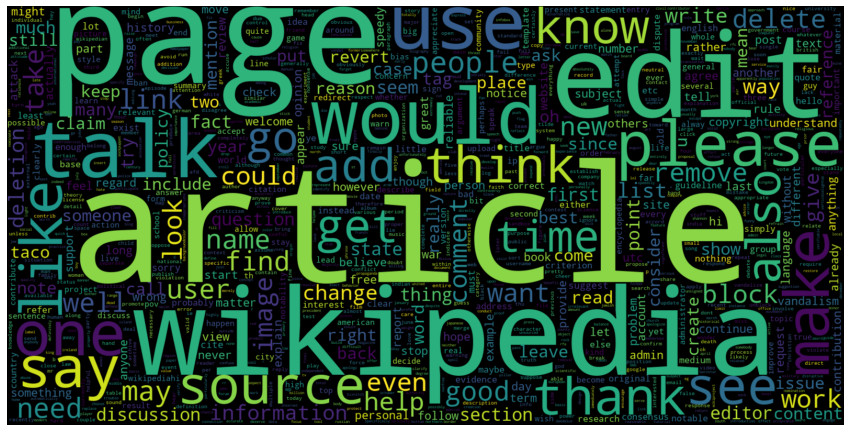

In [84]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 ,collocations=False,   stopwords=set(stop_words)).generate(" ".join(under_sampling[under_sampling["toxic"] == 0].cleaned_text))

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

### Popular Words used in Moderately Toxic Comments using Word Cloud

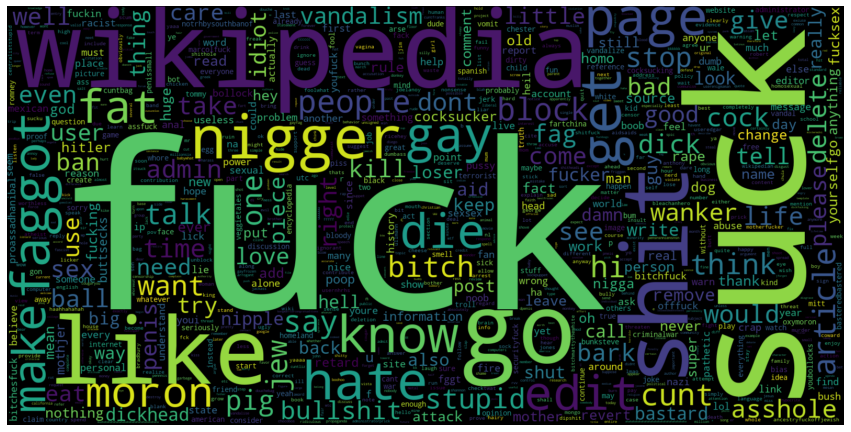

In [85]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 , collocations=False,  stopwords=set(stop_words)).generate(" ".join(under_sampling[under_sampling["toxic"] == 1].cleaned_text))

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

### Popular Words used in Severe Toxic Comments using Word Cloud

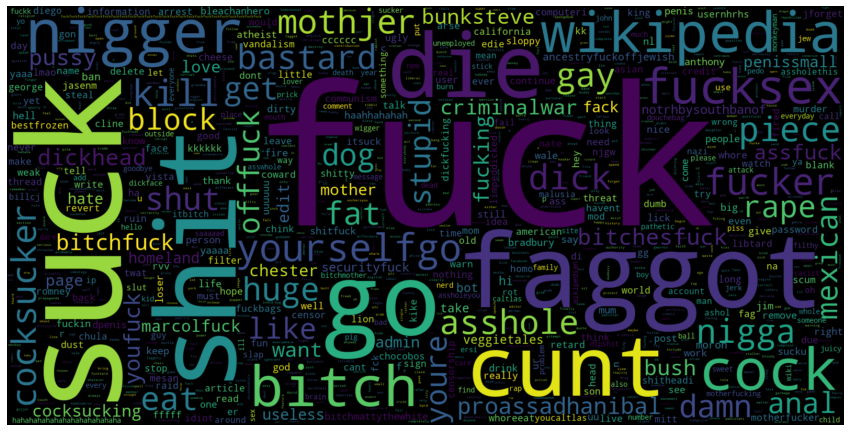

In [86]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 , collocations=False, stopwords=set(stop_words)).generate(" ".join(under_sampling[under_sampling["severe_toxic"] == 1].cleaned_text))

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
#collations = false means don't repeat same words

### Frequency of Words used in Non-Toxic

In [87]:
from collections import Counter

In [88]:
#only show top 10
non_toxic_corpus = pd.Series(" ".join(under_sampling[under_sampling["toxic"] == 0].cleaned_text))[0].split()

counter = Counter(non_toxic_corpus)
non_toxic_common = counter.most_common(10)
non_toxic_common = dict(non_toxic_common)
non_toxic_common_df = pd.DataFrame(non_toxic_common.items(), columns = ["words", "count"])
non_toxic_common_df.set_index("words")

count
words           
article     7507
page        5601
wikipedia   4002
talk        3497
would       3276
use         3266
edit        3056
please      3036
one         3028
make        2912

<function matplotlib.pyplot.show(*args, **kw)>

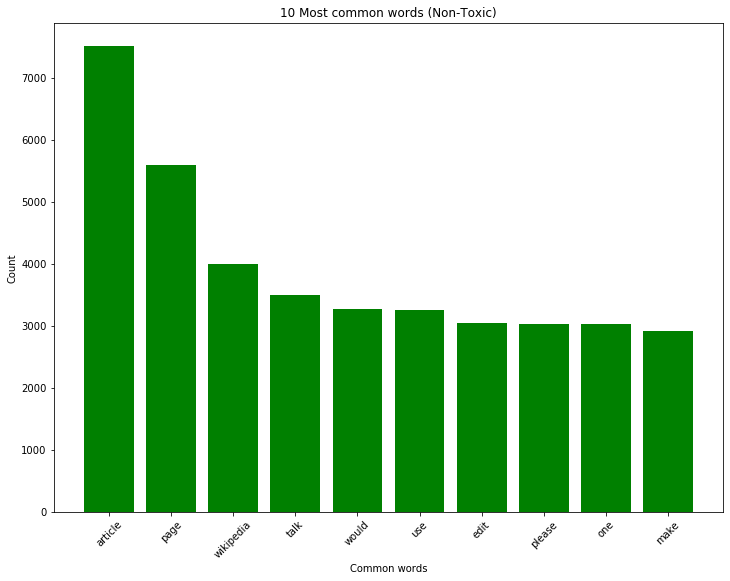

In [89]:
plt.figure(figsize=(12,9))
plt.bar(non_toxic_common.keys(), non_toxic_common.values(), color="Green")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (Non-Toxic)")
plt.show

### Frequency of Words used in Toxic

In [90]:
#only show top 10
toxic_corpus = pd.Series(" ".join(under_sampling[under_sampling["toxic"] == 1].cleaned_text))[0].split()

counter = Counter(toxic_corpus)
toxic_common = counter.most_common(10)
toxic_common = dict(toxic_common)
toxic_common_df = pd.DataFrame(toxic_common.items(), columns = ["words", "count"])
toxic_common_df.set_index("words")

count
words           
fuck       11442
suck        4589
wikipedia   4373
go          4089
like        3621
shit        3617
nigger      3417
get         3143
hate        2639
page        2555

<function matplotlib.pyplot.show(*args, **kw)>

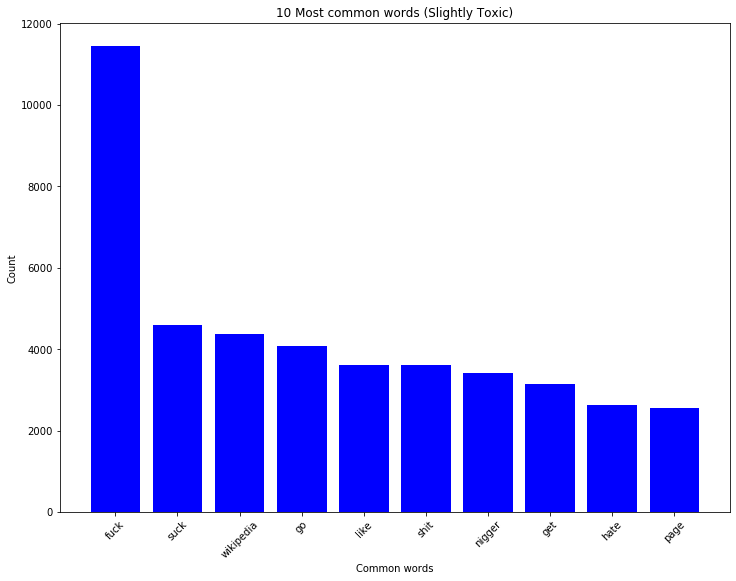

In [91]:
plt.figure(figsize=(12,9))
plt.bar(toxic_common.keys(), toxic_common.values(), color="Blue")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (Slightly Toxic)")
plt.show

### Frequency of Words used in Severely Toxic

In [92]:
#only show top 10
sev_toxic_corpus = pd.Series(" ".join(under_sampling[under_sampling["severe_toxic"] == 1].cleaned_text))[0].split()

counter = Counter(sev_toxic_corpus)
sev_toxic_common = counter.most_common(10)
sev_toxic_common = dict(sev_toxic_common)
sev_toxic_common_df = pd.DataFrame(sev_toxic_common.items(), columns = ["words", "count"])
sev_toxic_common_df.set_index("words")

count
words        
fuck     7188
suck     3324
shit     1883
as       1706
faggot   1576
go       1524
die      1159
cunt     1037
nigger   1017
cock      913

<function matplotlib.pyplot.show(*args, **kw)>

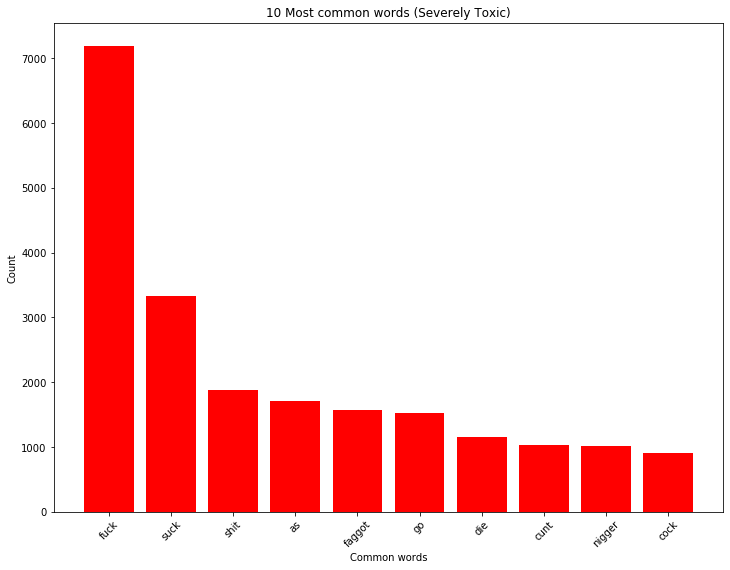

In [93]:
plt.figure(figsize=(12,9))
plt.bar(sev_toxic_common.keys(), sev_toxic_common.values(), color="Red")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (Severely Toxic)")
plt.show